# Tree Visualization

Decision trees are easy to visualise (if they are not too big) and there are libraries specific for this.
By plotting a tree we can better see the data distribution in each node and decide, for example, if the depth of the tree is appropriate.

(Based on Zdeněk Kasner notebook from 2024-2025 and [this dtreeviz example](https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb))

Google Colab should already have all the libraries we need except `dtreeviz`.

In [ ]:
!pip install graphviz dtreeviz tqdm scikit-learn matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.7 MB/s eta 0:00:00


If you are running this notebool locally, you should first create a virtual environment.
```bash
python -m venv trees
source trees/bin/activate
```
Then we need graphviz, which might not be installed by default.
On Windows, you can find the installer [here](https://graphviz.org/download/).
```bash
sudo apt update
sudo apt install graphviz
```
And finally we can install the python libraries:
```bash
pip install graphviz dtreeviz tqdm scikit-learn matplotlib numpy
```


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dtreeviz # For visualisation
import matplotlib.pyplot as plt
from sklearn import datasets # We will use toy datasets
from sklearn.metrics import accuracy_score
import tqdm.notebook as tqdm # Progress bars

## Plotting a tree with Scikit-Learn

Sklearn has its how method to plot trees.

For this example we are going to use the iris dataset. It has three classes (species of flowers) and 4 features (the width and length of the patals and tepals).

In [ ]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can quickly fit a decisition tree and see how it looks. We set max_depth to 3 so that is small enough to plot it.

In [ ]:
clf = DecisionTreeClassifier(random_state=5, max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=5)

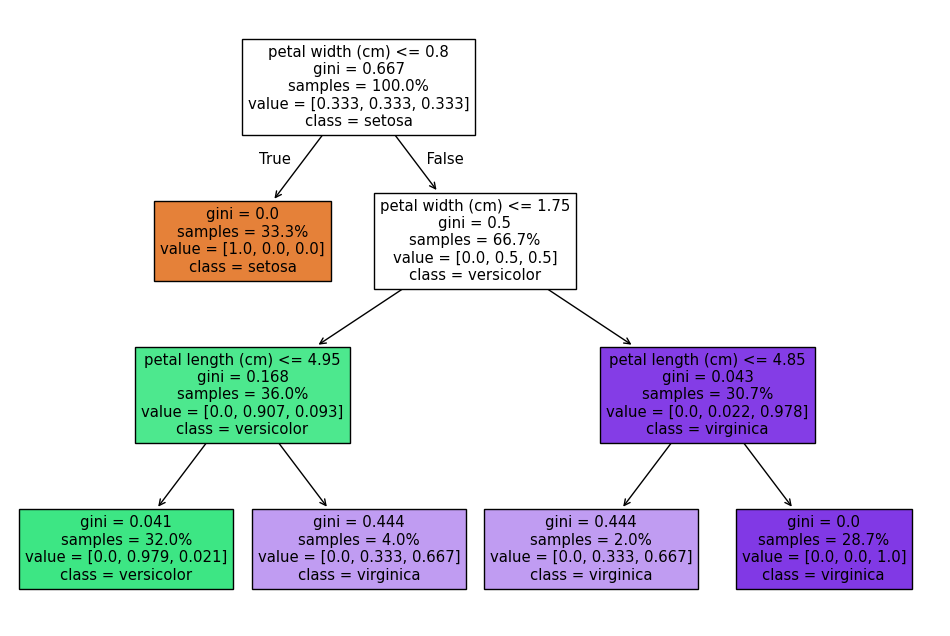

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, proportion=True, filled=True, ax=ax)

## Plotting a tree with Dtreeviz

dtreeviz allows us to plot tree from sklearn and other libraries.
It also plot the data distribution.
The downside is that dtreeviz is not maintained as actively as sklearn.

Another project similar to dtreeviz is supertree, which is also interactive.

Dtreeviz creates a wrapper around our classifier. Since it plots the data distribution, we also need to provide the data we used for training.

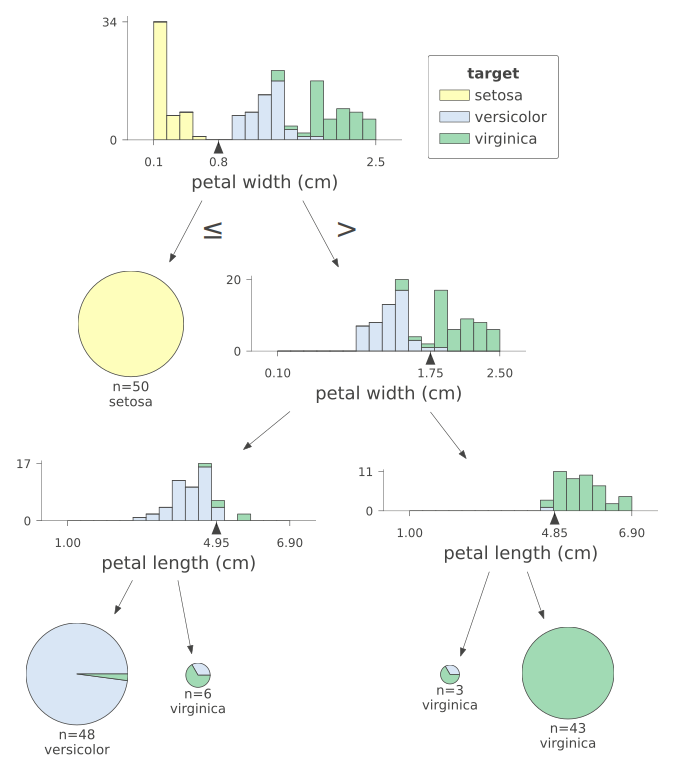

In [ ]:
viz = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=iris.target_names)
viz.view(scale=2, fontname='sans') # some matplotlib warning

## Plotting a prediction

We can also use dtreeviz to plot the path we follow when classifying a sample.
To do so, we use the same wrapper from before.

In [ ]:
x = X[100]
for i,j in zip(iris.feature_names, x):
    print(f'{i}: {j}')
pred = clf.predict([x])
pred = pred[0]
print(f'Prediction: {iris.target_names[pred]}')

sepal length (cm): 6.3
sepal width (cm): 3.3
petal length (cm): 6.0
petal width (cm): 2.5
Prediction: virginica


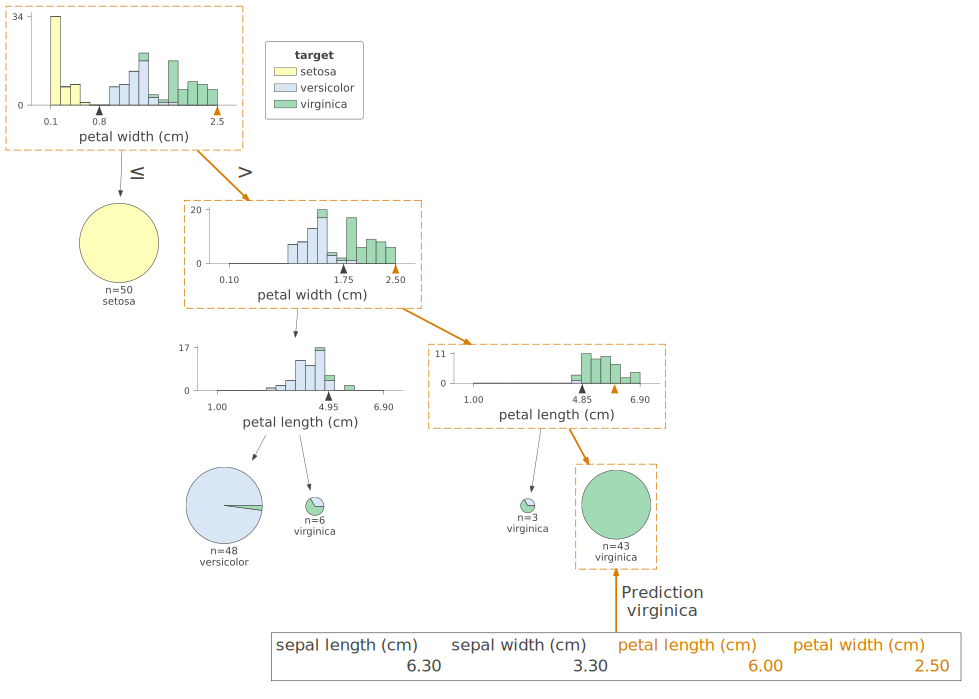

In [ ]:
viz.view(fontname='sans', x=x, scale=1.5)

## Plotting decision boundaries

We can use dtreeviz to easily plor the decision boundaries decision boundaries of a tree. In general, it is difficult to visualise more than 2-3 fetures at once. Here, we have 4 features but the tree is using just 2.

In the first plot we can see the leaf nodes with misclassified samples. In the second we don't see the boundaries because the tree does not use the sepal length or width.

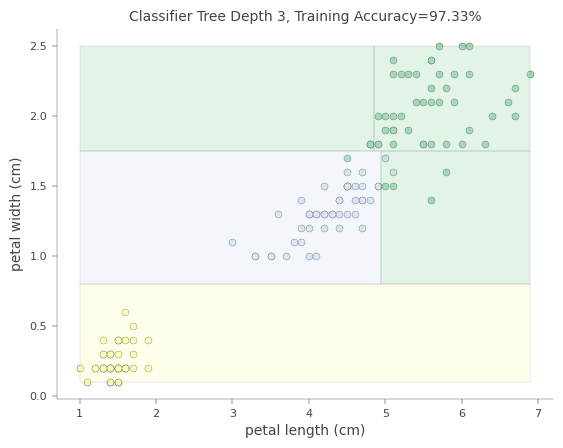

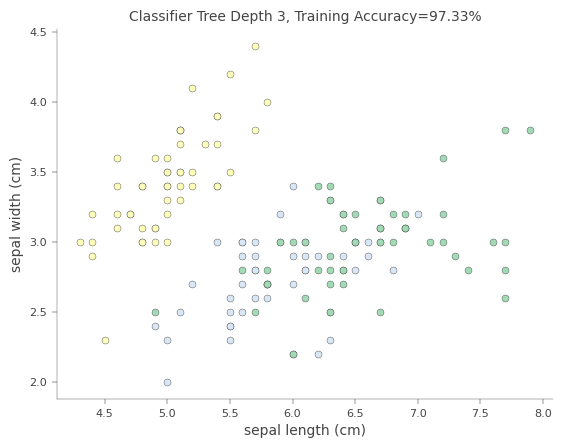

In [ ]:
viz.ctree_feature_space(show={'splits','title'}, features=['petal length (cm)', 'petal width (cm)'], fontname='sans')
viz.ctree_feature_space(show={'splits','title'}, features=['sepal length (cm)', 'sepal width (cm)'], fontname='sans') # These features are not used by the model

We can fit a larger tree, that can perfectly classify the training set. It uses the other two features to classify ~6 samples.

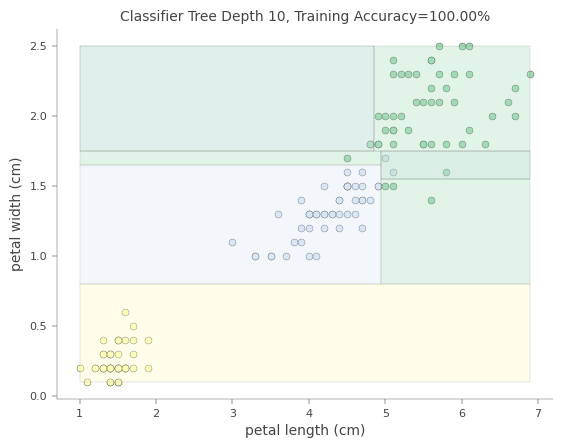

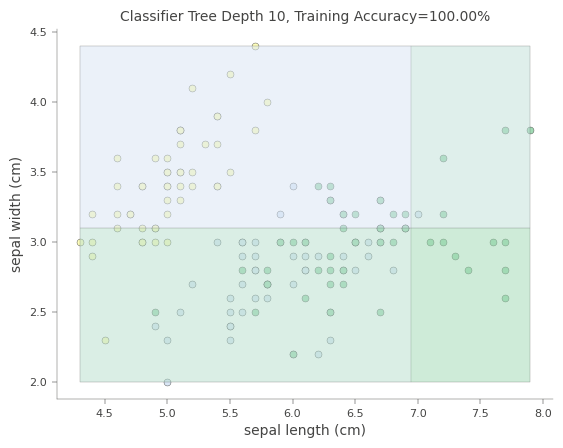

In [ ]:
clf2 = DecisionTreeClassifier(random_state=5, max_depth=10)
clf2.fit(X, y)
viz2 = dtreeviz.model(clf2, X, y,
    target_name="target",
    feature_names=iris.feature_names,
    class_names=iris.target_names)
viz2.ctree_feature_space(show={'splits','title'}, features=['petal length (cm)', 'petal width (cm)'], fontname='sans')
viz2.ctree_feature_space(show={'splits','title'}, features=['sepal length (cm)', 'sepal width (cm)'], fontname='sans')

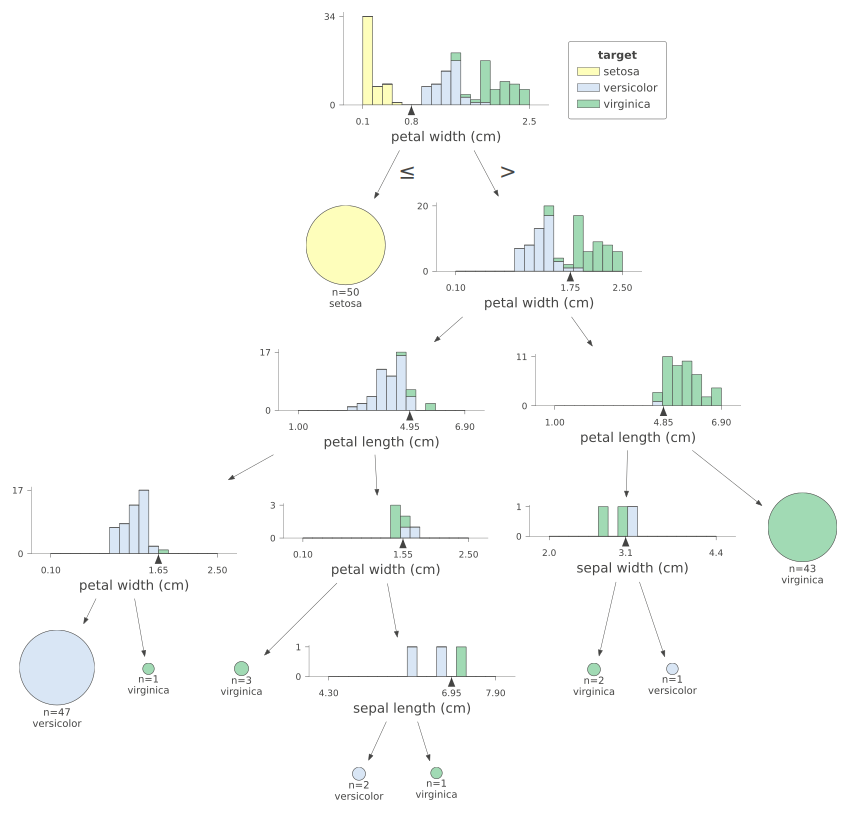

In [ ]:
viz2.view(fontname='sans', scale=1.5)

## Random Forest

We can use multiple trees to have better presictions.
Scikit-learn implementation uses soft voting: the predicted class is decided based on the average of the probability predicted by the each tree.

So if we have tree threes with the following predictions:
$[0.6, 0.2, 0.2]$, $[0.5, 0.5, 0.0]$ and $[0.4, 0.5, 0.1]$
Then the final prediction is $[0.5, 0.4, 0.1]$, so the first class.

If we were using hard voting, we would first predict a class from each tree and then take the most frequent one. In this example, if would be *first*, *first/second* (depending on tie breaking convention), and *second*. The output would be *first/second* (depending  on tie breaking).



Since a random forst is just a collection of tree, we can plot each tree. So first, we need to fit our model. In this example, we will use 6 tree with 2 as max depth.

Each tree is trained on different subsets of the training data and on a subset of the features.

In [ ]:
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=6)
rfc.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=6, random_state=0)

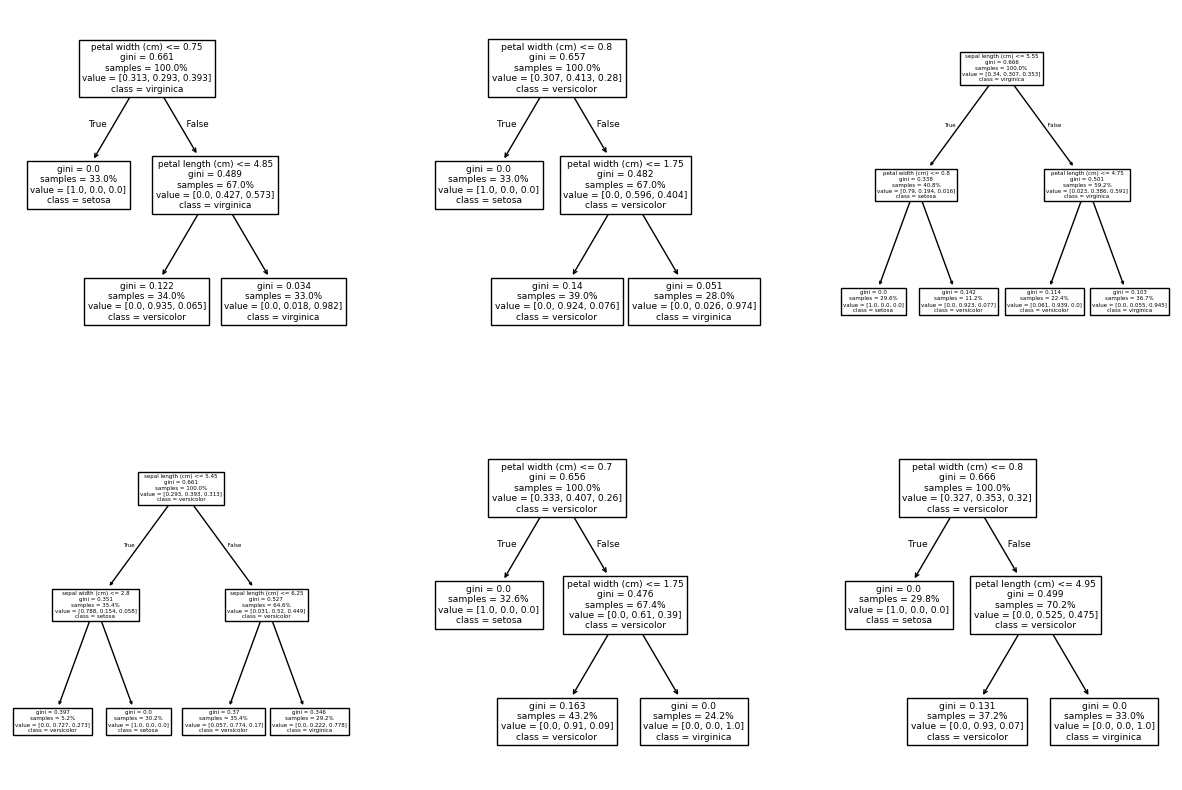

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for ax, tree in zip(axs.flat, rfc.estimators_):
    _ = plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, proportion=True, ax=ax)

## How many trees is enough?

If we add more trees, we can average out the outliers. But how many tree is enough?

To do this, we are going to use a different dataset, MNIST, because iris is too simple and the model would overfit too quickly.

In [ ]:
ds = datasets.load_digits()
X = ds.data
y = ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

(1347, 64)

In [ ]:
y_train.shape

(1347,)

We train a series of models with a different number of tree and different depth.
Then, we compare their accuracy and the number or tree/nodes that they have

In [ ]:
scores = [] # list of list of scores
trees = list(range(1, 152, 5)) # 1, 6, 11, ...,
depth = list(range(1, 5)) # 1, 2, 3, 4
total_nodes = [] # list of list of #nodes

for d in tqdm.tqdm(depth):
    scores.append([])
    total_nodes.append([])
    for n in tqdm.tqdm(trees, leave=False):
        # Train
        rfc = RandomForestClassifier(n_estimators=n, random_state=0, max_depth=d)
        rfc.fit(X_train, y_train)

        # Test
        y_pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores[d-1].append(accuracy)

        # Sum all the nodes in the forest
        total_nodes[d-1].append(sum(i.tree_.node_count for i in rfc.estimators_))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

What if we used a really big tree?

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
baseline = accuracy_score(y_test, y_pred)
print(f"Tree depth {clf.get_depth()}:", baseline)
print("Nodes: ", clf.tree_.node_count)

Tree depth 13: 0.8288888888888889
Nodes:  257


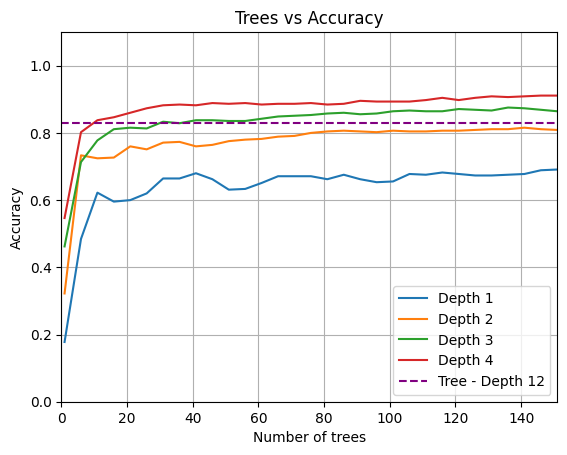

In [ ]:
for i, s in enumerate(scores):
    plt.plot(trees, s, label=f'Depth {i+1}')
plt.hlines(baseline, 0, 151, linestyles='dashed', colors='purple', label='Tree - Depth 12')
plt.ylim(0, 1.1)
plt.xlim(0, 151)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Trees vs Accuracy')
plt.grid(True)
plt.legend()
plt.show()

From the graph, we can see that after a certain point, increasing the depth does not help and that we can use smaller trees that a single large one.

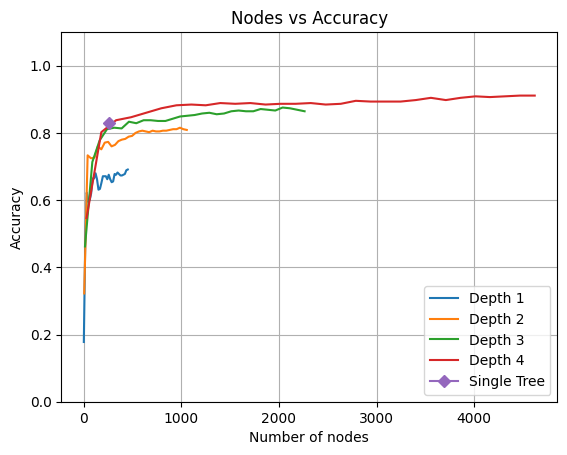

In [ ]:
for i, (t, s) in enumerate(zip(total_nodes, scores)):
    plt.plot(t, s, label=f'Depth {i+1}')
plt.plot([clf.tree_.node_count], [baseline], marker='D', label='Single Tree')
plt.ylim(0, 1.1)

plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.title('Nodes vs Accuracy')
plt.grid(True)
plt.legend()
plt.show()